# WGU Capstone Project - Data Visualization
Blake Sutton - Student ID: 001109490

### Running the Necessary Imports

In [2]:
import pandas as pd
import numpy as np
import datetime

In [2]:
# Setting bike to the data in the BikeData.csv file
bike = pd.read_csv("BikeData.csv")

In [3]:
# Giving glimpse into the structure of the data
bike.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall (mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Creating a new "Datetime" column using the "Date" and "Hour" column data

In [4]:
# Reformatting the data in the "Date" column from dd/mm/yyyy to standard date format
for i in range(0, len(bike["Date"])):
    bike["Date"][i] = datetime.datetime.strptime(bike["Date"][i], "%d/%m/%Y").date()

# Creating pd dataframe with dictionary of Day: Hour
dt_df = pd.DataFrame({
    'Day': np.array(bike["Date"]), 
    'Hour': np.array(bike["Hour"])})

# Combining the "Date" and "Hour" data from each row into one cell in the "Datetime" column
bike["Datetime"] = pd.to_datetime(dt_df.Day) + pd.to_timedelta(dt_df.Hour, unit='h')
bike.head()

/var/folders/6n/r0mykfwn6tn5_cbb6h96dln00000gn/T/ipykernel_66726/2238263408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike["Date"][i] = datetime.datetime.strptime(bike["Date"][i], "%d/%m/%Y").date()


,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall (mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Datetime
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 00:00:00
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 01:00:00
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 02:00:00
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 03:00:00
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 04:00:00


### Number of Sales Over Time

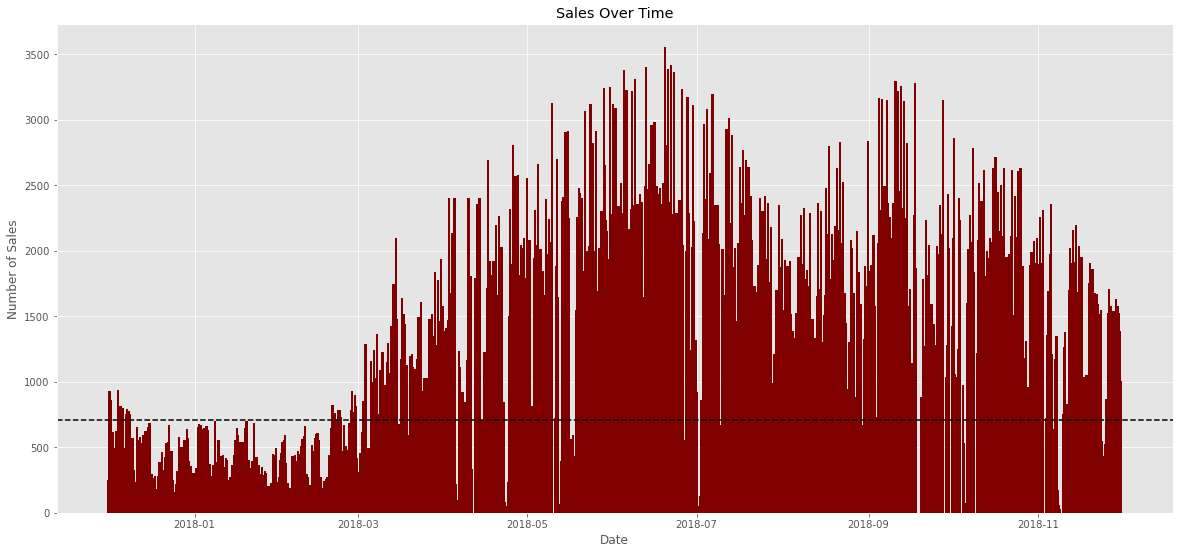

In [5]:
import matplotlib.pyplot as plt

plt.style.use('ggplot');

# OO method from scratch
fig, ax = plt.subplots(figsize=(20,9));

## Plot the data
bar = ax.bar(bike["Datetime"],
             bike["Rented Bike Count"],
             color="maroon");

# Customize the plot
ax.set(title='Sales Over Time',
       xlabel="Date",
       ylabel="Number of Sales");

# Add a horizontal line
ax.axhline(bike["Rented Bike Count"].mean(),
           label="Mean",
           color="black",
           linestyle="--");

### Relationship Between Bike Rentals and Temperature

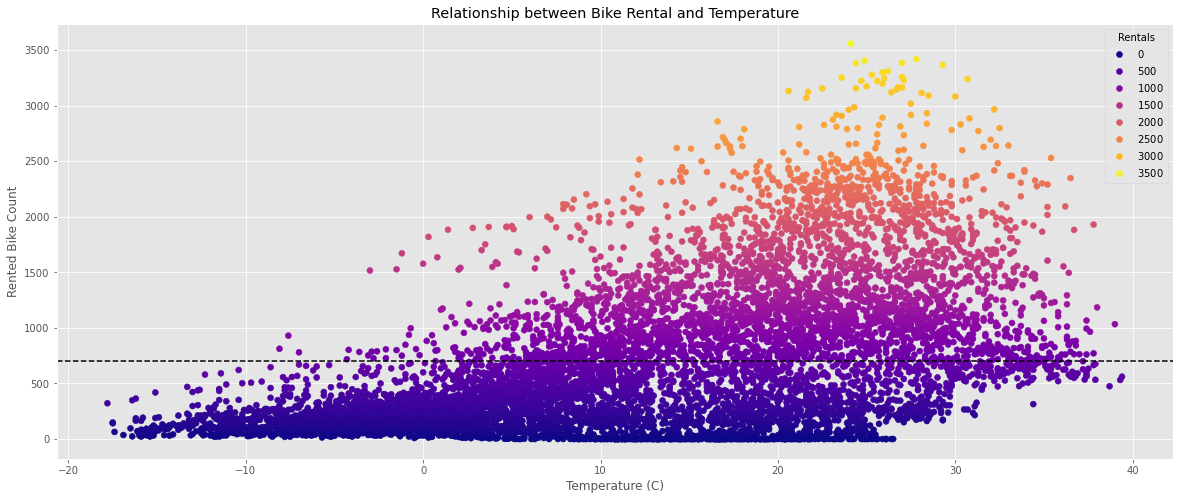

In [6]:
plt.style.use('ggplot');

# Setting subplots
fig, ax = plt.subplots(figsize=(20,8))

# Plot the data
scatter = ax.scatter(x=bike["Temperature (C)"],
                     y=bike["Rented Bike Count"],
                     c=bike["Rented Bike Count"],
                     cmap='plasma');

# Customize the plot
ax.set(title='Relationship between Bike Rental and Temperature',
       xlabel="Temperature (C)",
       ylabel="Rented Bike Count");

# Add a legend
ax.legend(*scatter.legend_elements(), title="Rentals");

# Add a horizontal line
ax.axhline(bike["Rented Bike Count"].mean(),
           label="Mean",
           color="black",
           linestyle="--");


### Relationship Between Bike Rentals and Rain

In [7]:
# Adding Precipitation boolean column - "True" if either "Rainfall (mm)" or "Snowfall (cm)" are greater than 0
bike["Precipitation"] = np.where((bike['Rainfall (mm)'] > 0) | (bike['Snowfall (cm)'] > 0), True, False)
bike

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall (mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Datetime,Precipitation
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 00:00:00,False
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 01:00:00,False
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 02:00:00,False
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 03:00:00,False
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 04:00:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30 19:00:00,False
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30 20:00:00,False
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30 21:00:00,False
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30 22:00:00,False


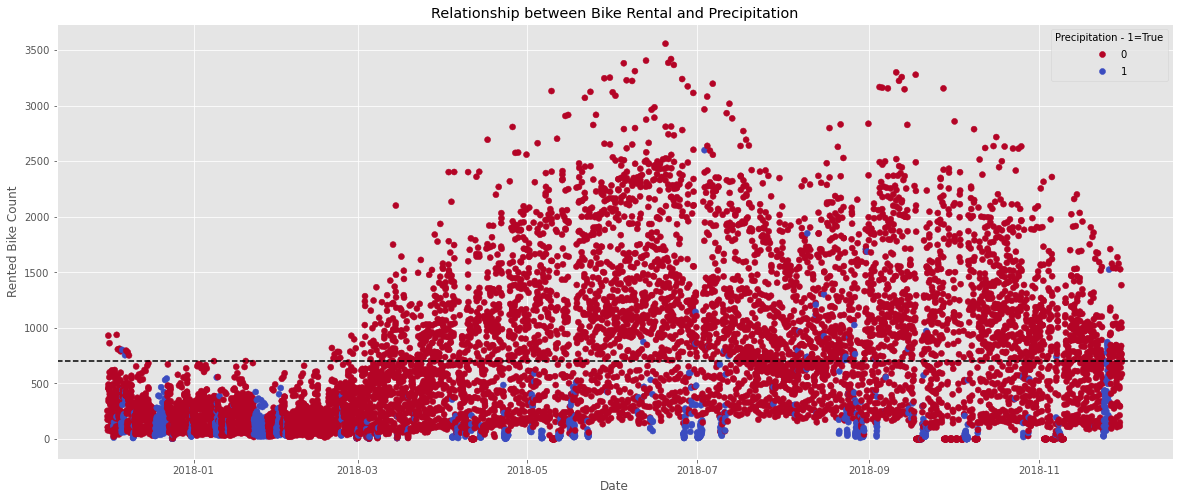

In [8]:
plt.style.use('ggplot');

fig, ax = plt.subplots(figsize=(20,8))

## Plot the data
scatter = ax.scatter(x=bike["Datetime"],
                     y=bike["Rented Bike Count"],
                     c=bike["Precipitation"],
                     cmap='coolwarm_r');

# Customize the plot
ax.set(title='Relationship between Bike Rental and Precipitation',
       xlabel="Date",
       ylabel="Rented Bike Count");

# Add a legend
ax.legend(*scatter.legend_elements(), title="Precipitation (1=True)");

# Add a horizontal line
ax.axhline(bike["Rented Bike Count"].mean(),
           label="Mean",
           color="black",
           linestyle="--");

### Relationship Between Bike Rentals and Humidity

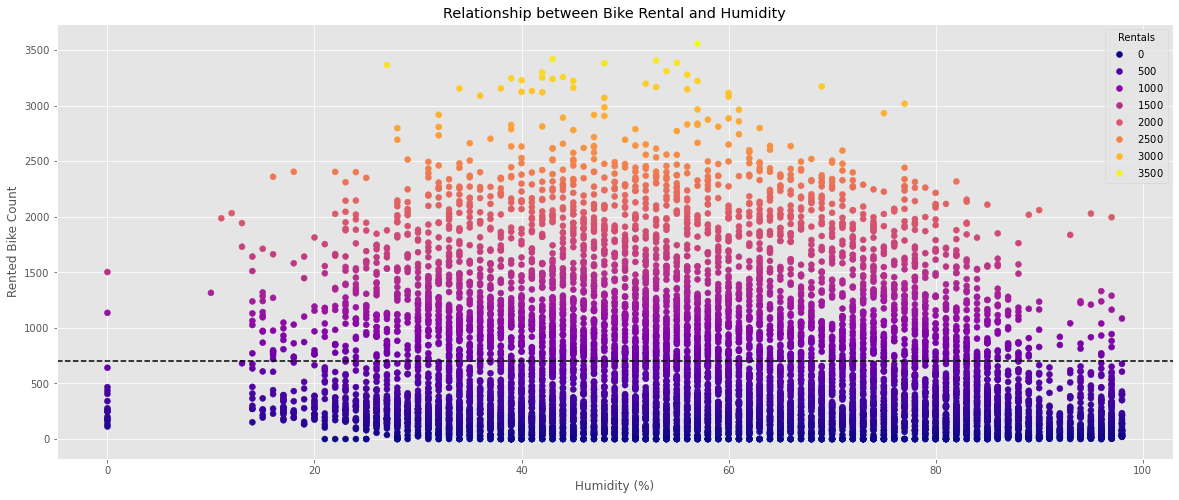

In [9]:
plt.style.use('ggplot');

fig, ax = plt.subplots(figsize=(20,8))

## Plot the data
scatter = ax.scatter(x=bike["Humidity (%)"],
                     y=bike["Rented Bike Count"],
                     c=bike["Rented Bike Count"],
                     cmap="plasma");

# Customize the plot
ax.set(title='Relationship between Bike Rental and Humidity',
       xlabel="Humidity (%)",
       ylabel="Rented Bike Count");

# Add a legend
ax.legend(*scatter.legend_elements(), title="Rentals");

# Add a horizontal line
ax.axhline(bike["Rented Bike Count"].mean(),
           label="Mean",
           color="black",
           linestyle="--");

### The First 25 Rows of the Data

In [5]:
bike_pred_data = pd.read_csv("prediction_data.csv")
bike_pred_data.head(30)

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Seasons,Holiday,Functioning Day,Precipitation,Day,Month,Year
0,254,0,-5.2,37,1,0,1,0,1,12,2017
1,204,1,-5.5,38,1,0,1,0,1,12,2017
2,173,2,-6.0,39,1,0,1,0,1,12,2017
3,107,3,-6.2,40,1,0,1,0,1,12,2017
4,78,4,-6.0,36,1,0,1,0,1,12,2017
5,100,5,-6.4,37,1,0,1,0,1,12,2017
6,181,6,-6.6,35,1,0,1,0,1,12,2017
7,460,7,-7.4,38,1,0,1,0,1,12,2017
8,930,8,-7.6,37,1,0,1,0,1,12,2017
9,490,9,-6.5,27,1,0,1,0,1,12,2017


### Comparing Sales and Temperature Over Time

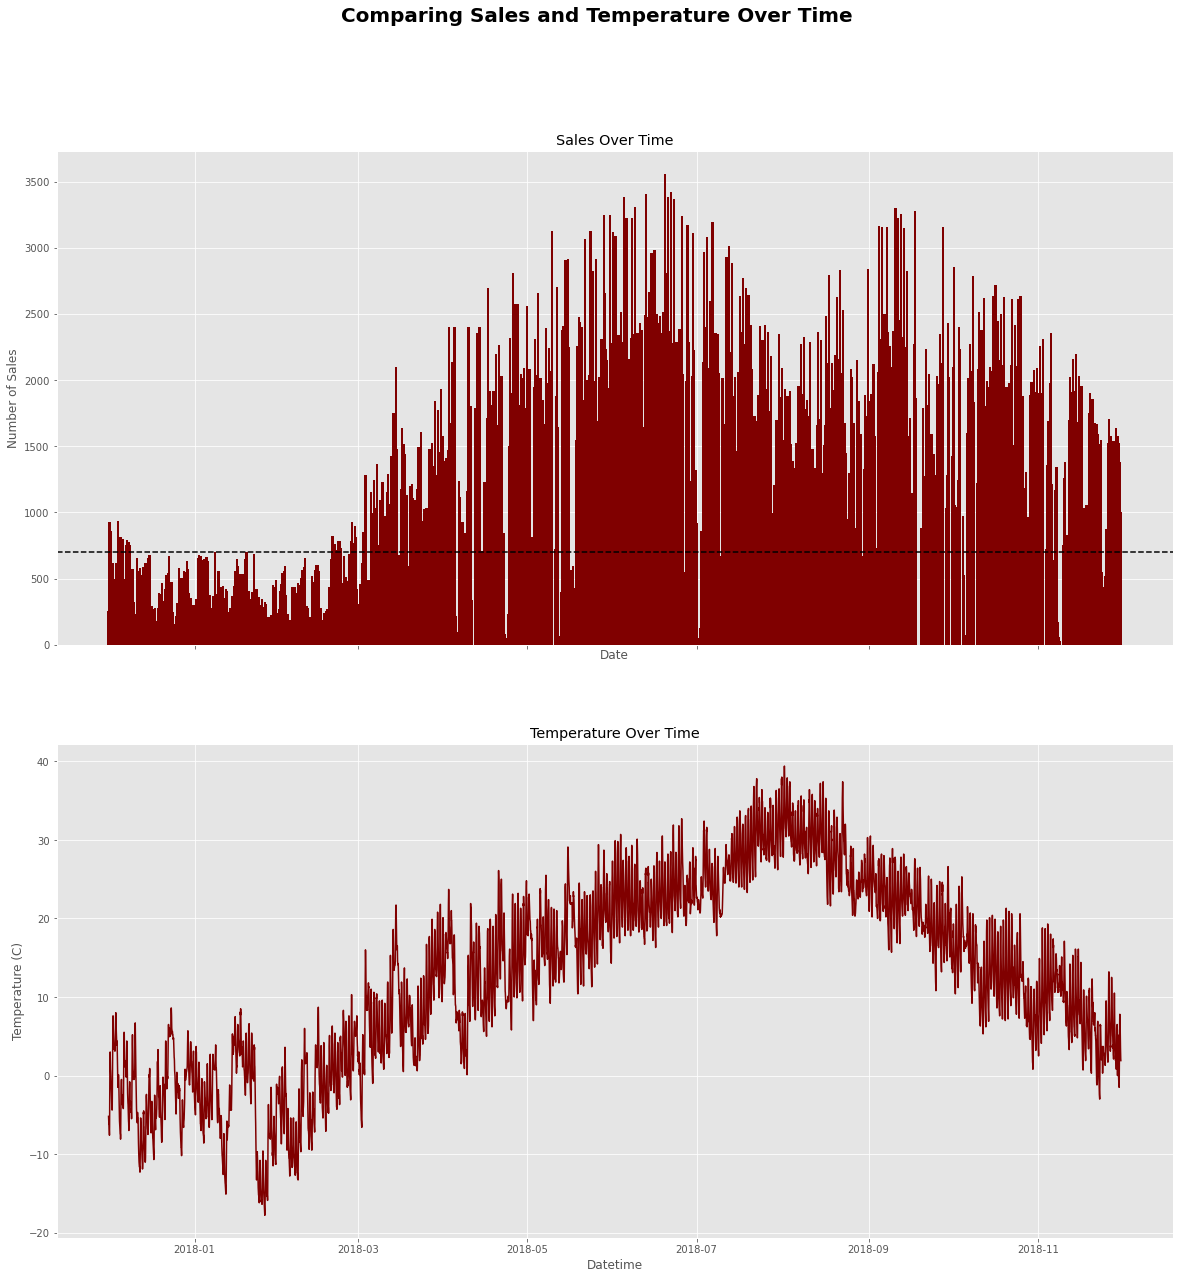

In [11]:
import matplotlib.pyplot as plt

plt.style.use('ggplot');

# OO method from scratch
fig, (ax0, ax1) = plt.subplots(nrows=2,
                                    ncols=1,
                                    figsize=(20,20),
                                    sharex=True);

# ------ Sales Over Time ------
# Plot the data
sales_bar = ax0.bar(bike["Datetime"],
                    bike["Rented Bike Count"],
                    color="maroon");

# Customize the plot
ax0.set(title="Sales Over Time",
        xlabel="Date",
        ylabel="Number of Sales");

# Add a horizontal line
ax0.axhline(bike["Rented Bike Count"].mean(),
            label="Mean",
            color="black",
            linestyle="--");


# ------ Temperature Over Time -------
# Plot the data
temp_plot = ax1.plot(bike["Datetime"],
                     bike["Temperature (C)"],
                     color="maroon");

# Customize the plot
ax1.set(title="Temperature Over Time",
        xlabel="Datetime",
        ylabel="Temperature (C)");

fig.suptitle("Comparing Sales and Temperature Over Time", fontsize= 20, fontweight="bold");